In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = pd.read_csv('student.csv')
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [5]:
data.shape

(1000, 3)

In [6]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

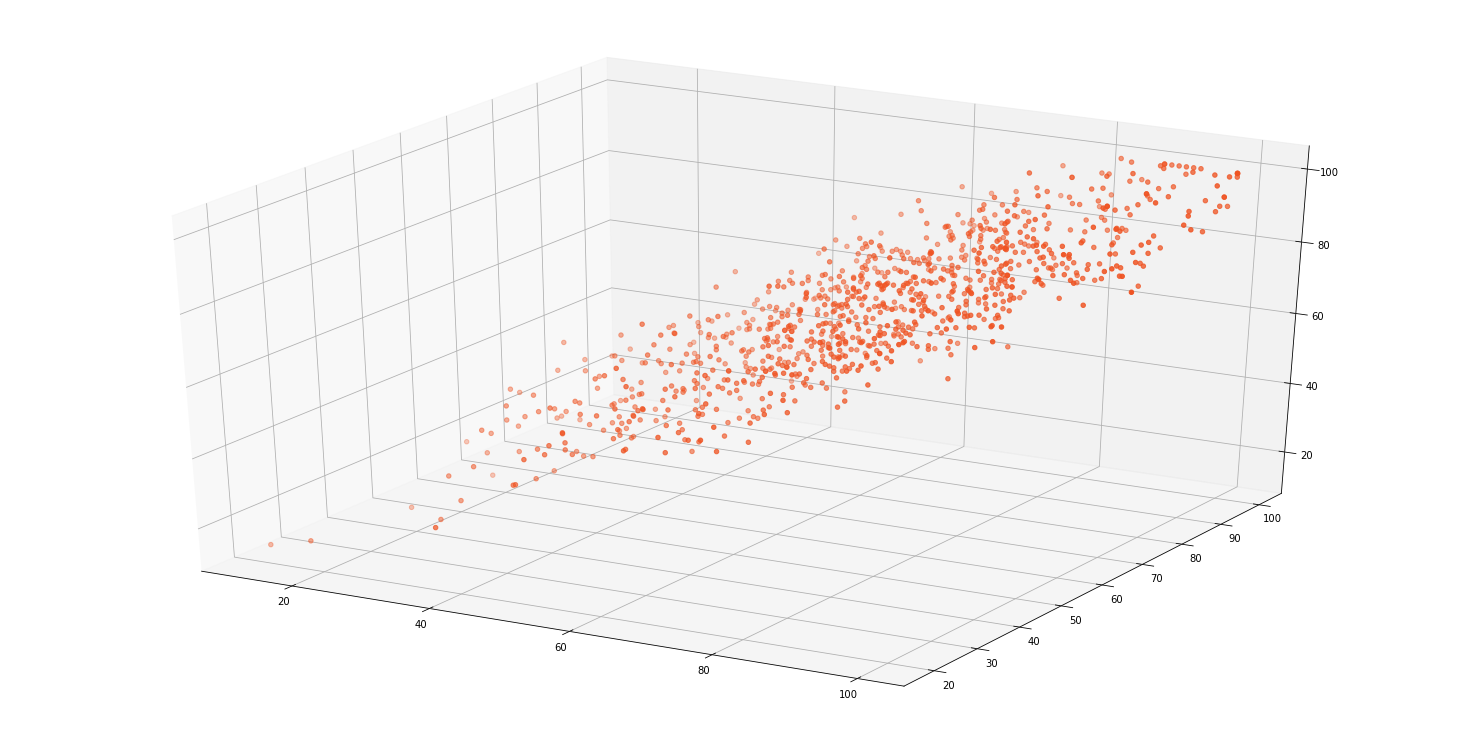

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show()

In [16]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
print(X.shape)
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001 

(1000, 3)


In [12]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [31]:
cost_function(X, Y, B)

2470.1100000000001

In [32]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [50]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [51]:
cost_history[-1]

10.475123473539171

In [52]:
newB

array([-0.47889172,  0.09137252,  0.90144884])

In [76]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [77]:
Y_pred = X.dot(newB)

In [78]:
rmse(Y, Y_pred)

4.5771439727277894

In [79]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [80]:
r2_score(Y, Y_pred)

0.90972232730615532